# Example of notebook usage

In [1]:
using ViscosityDrop
using JLD2
using Plots, Printf

## Set up simulation and run

In [2]:
filename = "example"
dir = "."
Ny, Nz = 64, 64
do_all(filename, dir, Ny=Ny, Nz=Nz, yLength=2, zLength=2,
                      ν=1e-1,
                      z_position=0.6, width=0.2, amplitude=-1e-1,
                      Δt=0.002, stop_time=120.0, iteration_interval=1000,
                      schedule_interval=0.5, output_fields = :all)

# Make animations

### First open simulation

In [3]:
file = jldopen("./example.jld2")

Ly = file["grid/Ly"]
Lz = file["grid/Lz"]
yb = range(-Ly/2,Ly/2,length=Ny)
zb = range(-Lz,0,length=Nz)

iterations = parse.(Int, keys(file["timeseries/t"]))

┌ Warning: This file was written in a newer version of the JLD2 file format.
│ Please consider updating JLD2.
└ @ JLD2 /Users/williamdavis/.julia/packages/JLD2/eU405/src/file_header.jl:35


241-element Array{Int64,1}:
     0
   250
   500
   750
  1000
  1251
  1502
  1753
  2004
  2255
  2506
  2757
  3008
     ⋮
 57427
 57678
 57929
 58180
 58431
 58682
 58933
 59184
 59435
 59686
 59937
 60188

### Buoyancy

┌ Info: Saved animation to 
│   fn = /Users/williamdavis/Dropbox/viscosometry/code/examples/tmp.gif
└ @ Plots /Users/williamdavis/.julia/packages/Plots/w4QRq/src/animation.jl:104


Plots.AnimatedGif("/Users/williamdavis/Dropbox/viscosometry/code/examples/tmp.gif")
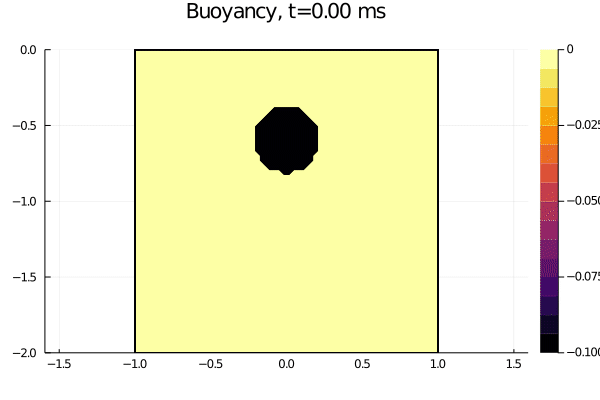

In [4]:
@gif for iter in iterations
    t = file["timeseries/t/$iter"]*7.4e-2
    b_snapshot = file["timeseries/b/$iter"][1, :, :]

    contourf(yb, zb, b_snapshot',color=:inferno,
             title="Buoyancy, t=$(@sprintf("%.2f", t)) ms",
             aspect_ratio=:equal)
end

### Vorticity

┌ Info: Saved animation to 
│   fn = /Users/williamdavis/Dropbox/viscosometry/code/examples/tmp.gif
└ @ Plots /Users/williamdavis/.julia/packages/Plots/w4QRq/src/animation.jl:104


Plots.AnimatedGif("/Users/williamdavis/Dropbox/viscosometry/code/examples/tmp.gif")
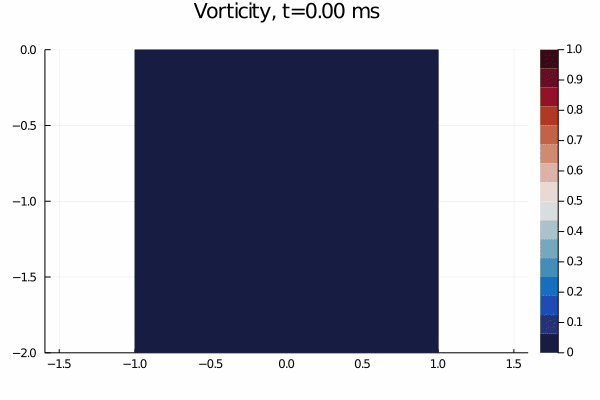

In [5]:
@gif for iter in iterations
    t = file["timeseries/t/$iter"]*7.4e-2
    ω_snapshot = file["timeseries/ω/$iter"][1, 1:Ny, 1:Nz]

    contourf(yb, zb, ω_snapshot',color=:balance,
             title="Vorticity, t=$(@sprintf("%.2f", t)) ms",
             aspect_ratio=:equal)
end

# Post-processing

Function `get_results()` will also save a `txt` file.

In [6]:
out_results = get_results(dir, dir, "example.jld2"; Ncourse=11, verbose=false)

241×5 Array{Float64,2}:
   0.0  0.201304  -0.00148309   -0.596437   1.0
   0.5  0.201304  -0.00148309   -0.596437   1.0
   1.0  0.201304  -0.00148309   -0.596437   1.0
   1.5  0.201304  -0.00148309   -0.596437   1.0
   2.0  0.201304  -0.00148309   -0.596437   1.0
   2.5  0.2        0.0          -0.6       10.0
   3.0  0.199443  -0.00243334   -0.626725   5.0
   3.5  0.199917   0.00132661   -0.626156   3.0
   4.0  0.199917   0.00132661   -0.626156   3.0
   4.5  0.199917   0.00132661   -0.626156   3.0
   5.0  0.199917   0.00132661   -0.626156   3.0
   5.5  0.202991   0.000308039  -0.629281   4.0
   6.0  0.198043  -0.00259484   -0.654105   9.0
   ⋮                                       
 114.5  0.2        0.0          -1.6       29.0
 115.0  0.197329   0.0163678    -1.60212   26.0
 115.5  0.200026   0.014892     -1.60077   24.0
 116.0  0.19712    0.0160928    -1.60414   22.0
 116.5  0.198323   0.0093421    -1.60859   25.0
 117.0  0.198323   0.0093421    -1.60859   26.0
 117.5  0.198022   0

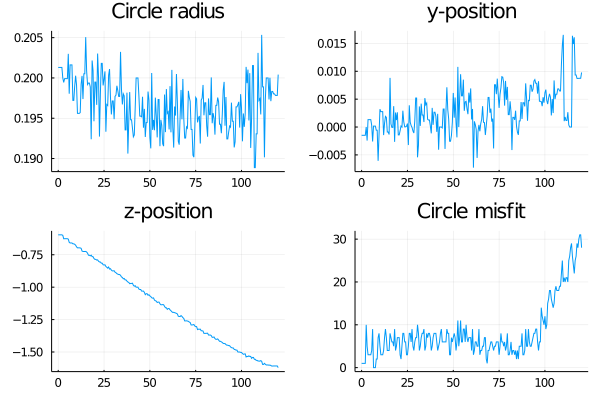

In [7]:
p1 = plot(out_results[:,1],out_results[:,2],
          label="test1", title="Circle radius");
p2 = plot(out_results[:,1],out_results[:,3],
          label="test1", title="y-position");
p3 = plot(out_results[:,1],out_results[:,4],
          label="test1", title="z-position");
p4 = plot(out_results[:,1],out_results[:,5],
          label="test1", title="Circle misfit");
p_all = plot(p1, p2, p3, p4, layout = (2, 2), legend = false)